In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
import warnings
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, log_loss, classification_report
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split


# TASK2 数据分析

## 读取数据

In [2]:
data_train = pd.read_csv('F:/毕业论文/数据/train.csv')

In [3]:
data_test_a = pd.read_csv('F:/毕业论文/数据/testA.csv')

## 总体了解

In [4]:
data_test_a.shape

(200000, 46)

In [5]:
data_train.shape

(800000, 47)

In [6]:
data_train.columns

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'isDefault',
       'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
       'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8',
       'n9', 'n10', 'n11', 'n12', 'n13', 'n14'],
      dtype='object')

In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

In [8]:
data_train.describe()

id       loanAmnt           term   interestRate  \
count  800000.000000  800000.000000  800000.000000  800000.000000   
mean   399999.500000   14416.818875       3.482745      13.238391   
std    230940.252015    8716.086178       0.855832       4.765757   
min         0.000000     500.000000       3.000000       5.310000   
25%    199999.750000    8000.000000       3.000000       9.750000   
50%    399999.500000   12000.000000       3.000000      12.740000   
75%    599999.250000   20000.000000       3.000000      15.990000   
max    799999.000000   40000.000000       5.000000      30.990000   

         installment  employmentTitle  homeOwnership  annualIncome  \
count  800000.000000    799999.000000  800000.000000  8.000000e+05   
mean      437.947723     72005.351714       0.614213  7.613391e+04   
std       261.460393    106585.640204       0.675749  6.894751e+04   
min        15.690000         0.000000       0.000000  0.000000e+00   
25%       248.450000       427.000000       0.000000  4.560000e+04   
50%       375.135000      7755.000000       1.000000  6.500000e+04   
75%       580.710000    117663.500000       1.000000  9.000000e+04   
max      1715.420000    378351.000000       5.000000  1.099920e+07   

       verificationStatus      isDefault  ...             n5             n6  \
count       800000.000000  800000.000000  ...  759730.000000  759730.000000   
mean             1.009683       0.199513  ...       8.107937       8.575994   
std              0.782716       0.399634  ...       4.799210       7.400536   
min              0.000000       0.000000  ...       0.000000       0.000000   
25%              0.000000       0.000000  ...       5.000000       4.000000   
50%              1.000000       0.000000  ...       7.000000       7.000000   
75%              2.000000       0.000000  ...      11.000000      11.000000   
max              2.000000       1.000000  ...      70.000000     132.000000   

                  n7             n8             n9            n10  \
count  759730.000000  759729.000000  759730.000000  766761.000000   
mean        8.282953      14.622488       5.592345      11.643896   
std         4.561689       8.124610       3.216184       5.484104   
min         0.000000       1.000000       0.000000       0.000000   
25%         5.000000       9.000000       3.000000       8.000000   
50%         7.000000      13.000000       5.000000      11.000000   
75%        10.000000      19.000000       7.000000      14.000000   
max        79.000000     128.000000      45.000000      82.000000   

                 n11            n12            n13            n14  
count  730248.000000  759730.000000  759730.000000  759730.000000  
mean        0.000815       0.003384       0.089366       2.178606  
std         0.030075       0.062041       0.509069       1.844377  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       1.000000  
50%         0.000000       0.000000       0.000000       2.000000  
75%         0.000000       0.000000       0.000000       3.000000  
max         4.000000       4.000000      39.000000      30.000000  

[8 rows x 42 columns]

In [9]:
data_train.head(3).append(data_train.tail(3))

id  loanAmnt  term  interestRate  installment grade subGrade  \
0            0   35000.0     5         19.52       917.97     E       E2   
1            1   18000.0     5         18.49       461.90     D       D2   
2            2   12000.0     5         16.99       298.17     D       D3   
799997  799997    6000.0     3         13.33       203.12     C       C3   
799998  799998   19200.0     3          6.92       592.14     A       A4   
799999  799999    9000.0     3         11.06       294.91     B       B3   

        employmentTitle employmentLength  homeOwnership  ...    n5    n6  \
0                 320.0          2 years              2  ...   9.0   8.0   
1              219843.0          5 years              0  ...   NaN   NaN   
2               31698.0          8 years              0  ...   0.0  21.0   
799997           2582.0        10+ years              1  ...   4.0  26.0   
799998            151.0        10+ years              0  ...  10.0   6.0   
799999             13.0          5 years              0  ...   3.0   4.0   

          n7    n8   n9   n10  n11  n12  n13  n14  
0        4.0  12.0  2.0   7.0  0.0  0.0  0.0  2.0  
1        NaN   NaN  NaN  13.0  NaN  NaN  NaN  NaN  
2        4.0   5.0  3.0  11.0  0.0  0.0  0.0  4.0  
799997   4.0  10.0  4.0   5.0  0.0  0.0  1.0  4.0  
799998  12.0  22.0  8.0  16.0  0.0  0.0  0.0  5.0  
799999   4.0   8.0  3.0   7.0  0.0  0.0  0.0  2.0  

[6 rows x 47 columns]

## 缺失值 

In [10]:
print(f'There are {data_train.isnull().any().sum()} columns in train dataset with missing values.')

There are 22 columns in train dataset with missing values.


In [11]:
have_null_fea_dict = (data_train.isnull().sum()/len(data_train)).to_dict()
fea_null_moreThanHalf = {}
for key,value in have_null_fea_dict.items():
    if value > 0.5:
        fea_null_moreThanHalf[key] = value

In [12]:
fea_null_moreThanHalf

{}

<AxesSubplot:>

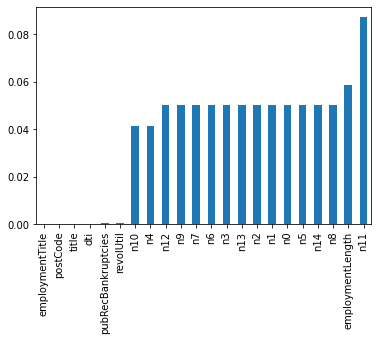

In [13]:
# nan可视化
missing = data_train.isnull().sum()/len(data_train)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

## 唯一值 

In [14]:
one_value_fea = [col for col in data_train.columns if data_train[col].nunique() <= 1]

In [15]:
one_value_fea_test = [col for col in data_test_a.columns if data_test_a[col].nunique() <= 1]

In [16]:
one_value_fea

['policyCode']

In [17]:
one_value_fea_test

['policyCode']

In [18]:
print(f'There are {len(one_value_fea)} columns in train dataset with one unique value.')
print(f'There are {len(one_value_fea_test)} columns in test dataset with one unique value.')

There are 1 columns in train dataset with one unique value.
There are 1 columns in test dataset with one unique value.


## 数值类型 对象类型

In [19]:
numerical_fea = list(data_train.select_dtypes(exclude=['object']).columns)
category_fea = list(filter(lambda x: x not in numerical_fea,list(data_train.columns)))

In [20]:
numerical_fea

['id',
 'loanAmnt',
 'term',
 'interestRate',
 'installment',
 'employmentTitle',
 'homeOwnership',
 'annualIncome',
 'verificationStatus',
 'isDefault',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'initialListStatus',
 'applicationType',
 'title',
 'policyCode',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14']

In [21]:
category_fea

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

In [22]:
data_train.grade

0         E
1         D
2         D
3         A
4         C
         ..
799995    C
799996    A
799997    C
799998    A
799999    B
Name: grade, Length: 800000, dtype: object

In [23]:
#过滤数值型类别特征
def get_numerical_serial_fea(data,feas):
    numerical_serial_fea = []
    numerical_noserial_fea = []
    for fea in feas:
        temp = data[fea].nunique()
        if temp <= 10:
            numerical_noserial_fea.append(fea)
            continue
        numerical_serial_fea.append(fea)
    return numerical_serial_fea,numerical_noserial_fea
numerical_serial_fea,numerical_noserial_fea = get_numerical_serial_fea(data_train,numerical_fea)

In [24]:
numerical_serial_fea

['id',
 'loanAmnt',
 'interestRate',
 'installment',
 'employmentTitle',
 'annualIncome',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'title',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n13',
 'n14']

In [25]:
numerical_noserial_fea

['term',
 'homeOwnership',
 'verificationStatus',
 'isDefault',
 'initialListStatus',
 'applicationType',
 'policyCode',
 'n11',
 'n12']

### 数值类别型变量分析

In [26]:
data_train['term'].value_counts()#离散型变量

3    606902
5    193098
Name: term, dtype: int64

In [27]:
data_train['homeOwnership'].value_counts()#离散型变量

0    395732
1    317660
2     86309
3       185
5        81
4        33
Name: homeOwnership, dtype: int64

In [28]:
data_train['verificationStatus'].value_counts()#离散型变量

1    309810
2    248968
0    241222
Name: verificationStatus, dtype: int64

In [29]:
data_train['initialListStatus'].value_counts()#离散型变量

0    466438
1    333562
Name: initialListStatus, dtype: int64

In [30]:
data_train['applicationType'].value_counts()#离散型变量

0    784586
1     15414
Name: applicationType, dtype: int64

In [31]:
data_train['policyCode'].value_counts()#离散型变量，无用，全部一个值

1.0    800000
Name: policyCode, dtype: int64

In [32]:
data_train['n11'].value_counts()#离散型变量，相差悬殊，用不用再分析

0.0    729682
1.0       540
2.0        24
4.0         1
3.0         1
Name: n11, dtype: int64

In [33]:
data_train['n12'].value_counts()#离散型变量，相差悬殊，用不用再分析

0.0    757315
1.0      2281
2.0       115
3.0        16
4.0         3
Name: n12, dtype: int64

### 数值连续型变量分析

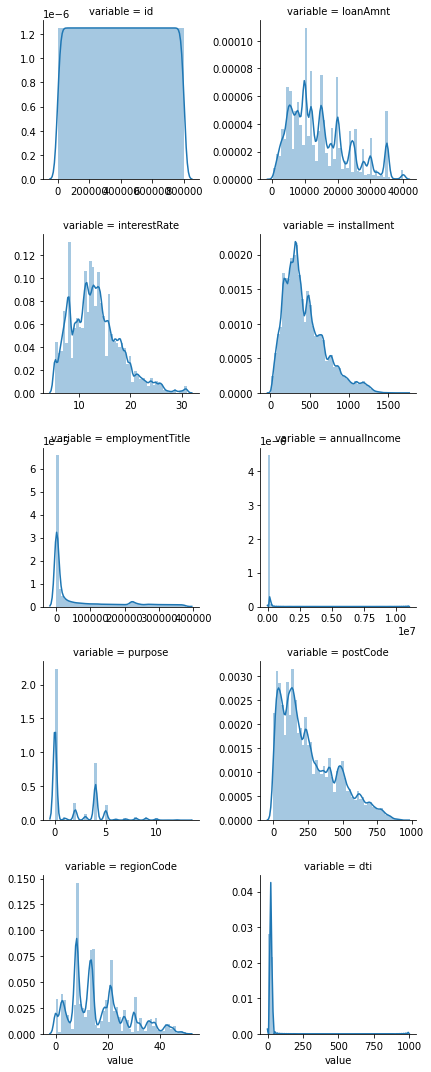

In [34]:
#每个数字特征得分布可视化
f = pd.melt(data_train, value_vars=['id','loanAmnt', 'interestRate', 'installment',
 'employmentTitle',
 'annualIncome',
 'purpose',
 'postCode',
 'regionCode',
 'dti'])
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

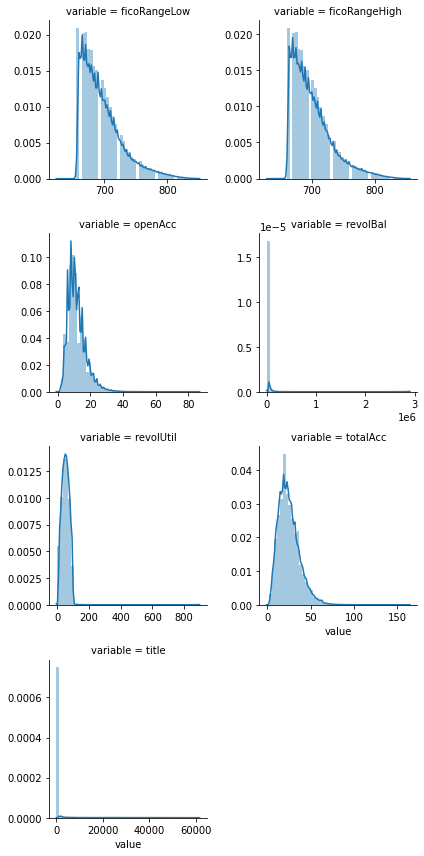

In [35]:
#每个数字特征得分布可视化
f = pd.melt(data_train, value_vars=['ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'title'])
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

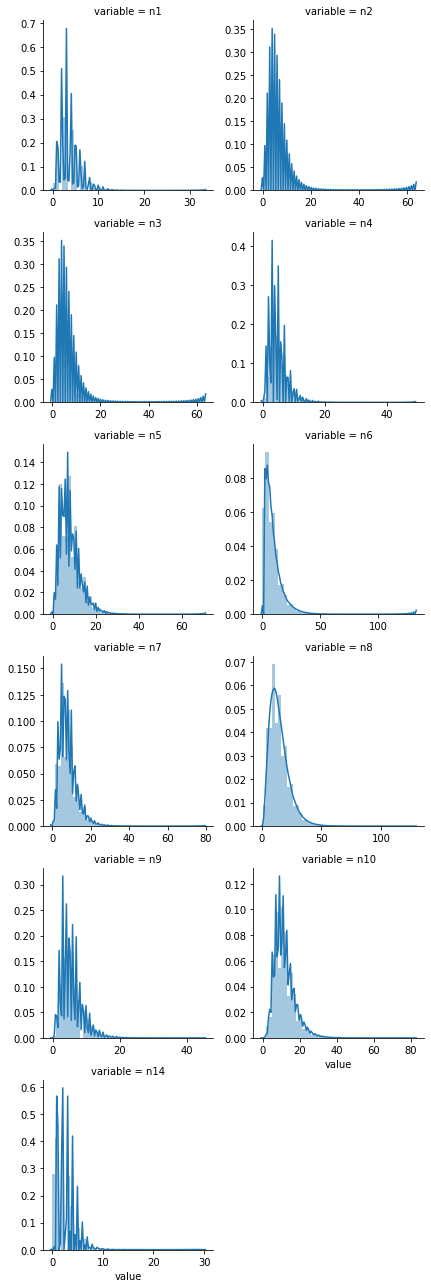

In [36]:
#每个数字特征得分布可视化
f = pd.melt(data_train, value_vars=['n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n14'])
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

## 下面这些KDE不得行 密度曲线画不出来

(array([7.89164e+05, 8.71100e+03, 1.50600e+03, 4.22000e+02, 1.46000e+02,
        2.90000e+01, 1.30000e+01, 2.00000e+00, 5.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00]),
 array([ 0.  ,  3.25,  6.5 ,  9.75, 13.  , 16.25, 19.5 , 22.75, 26.  ,
        29.25, 32.5 , 35.75, 39.  ]),
 <BarContainer object of 12 artists>)

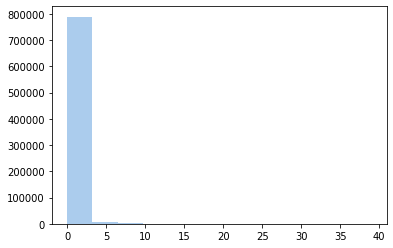

In [37]:
plt.hist(data_train['delinquency_2years'], bins=12, color=sns.desaturate("#a3ccf5", .8))

(array([7.99727e+05, 2.38000e+02, 2.20000e+01, 5.00000e+00, 0.00000e+00,
        1.00000e+00, 4.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00]),
 array([ 0.        ,  7.16666667, 14.33333333, 21.5       , 28.66666667,
        35.83333333, 43.        , 50.16666667, 57.33333333, 64.5       ,
        71.66666667, 78.83333333, 86.        ]),
 <BarContainer object of 12 artists>)

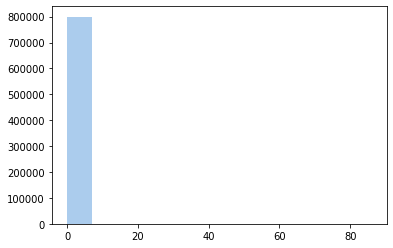

In [38]:
plt.hist(data_train['pubRec'], bins=12, color=sns.desaturate("#a3ccf5", .8))

(array([7.00076e+05, 9.36390e+04, 4.56600e+03, 9.45000e+02, 2.48000e+02,
        8.00000e+01, 2.30000e+01, 1.10000e+01, 3.00000e+00, 3.00000e+00,
        0.00000e+00, 1.00000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 <BarContainer object of 12 artists>)

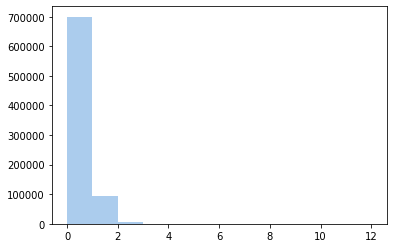

In [39]:
plt.hist(data_train['pubRecBankruptcies'], bins=12, color=sns.desaturate("#a3ccf5", .8))

(array([7.42503e+05, 1.40640e+04, 2.43200e+03, 5.11000e+02, 1.33000e+02,
        5.10000e+01, 2.10000e+01, 9.00000e+00, 4.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00]),
 array([ 0.  ,  4.25,  8.5 , 12.75, 17.  , 21.25, 25.5 , 29.75, 34.  ,
        38.25, 42.5 , 46.75, 51.  ]),
 <BarContainer object of 12 artists>)

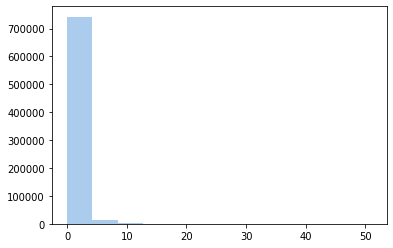

In [40]:
plt.hist(data_train['n0'], bins=12, color=sns.desaturate("#a3ccf5", .8))

(array([7.56982e+05, 1.92600e+03, 5.32000e+02, 1.86000e+02, 7.00000e+01,
        1.60000e+01, 1.10000e+01, 1.00000e+00, 4.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00]),
 array([ 0.  ,  3.25,  6.5 ,  9.75, 13.  , 16.25, 19.5 , 22.75, 26.  ,
        29.25, 32.5 , 35.75, 39.  ]),
 <BarContainer object of 12 artists>)

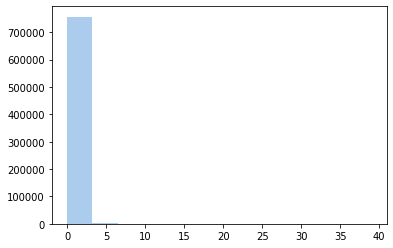

In [41]:
plt.hist(data_train['n13'], bins=12, color=sns.desaturate("#a3ccf5", .8))

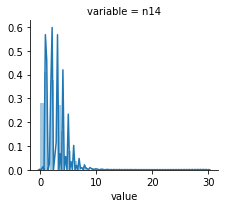

In [42]:
#每个数字特征得分布可视化

f = pd.melt(data_train, value_vars=[ 'n14'])
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

## 模型改进的时候 可以把数据正态化！！！！！！

#### 查看某一个数值型变量的分布，查看变量是否符合正态分布，如果不符合正太分布的变量可以log化后再观察下是否符合正态分布。如果想统一处理一批数据变标准化 必须把这些之前已经正态化的数据提出。正态化的原因：一些情况下正态非正态可以让模型更快的收敛，一些模型要求数据正态（eg. GMM、KNN）,保证数据不要过偏态即可，过于偏态可能会影响模型预测结果。

Text(0, 0.5, 'Probability')

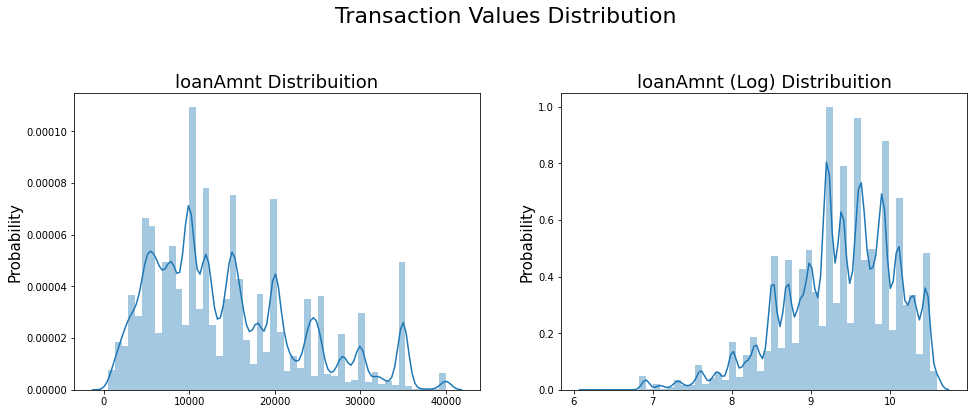

In [43]:
#Ploting Transaction Amount Values Distribution
plt.figure(figsize=(16,12))
plt.suptitle('Transaction Values Distribution', fontsize=22)
plt.subplot(221)
sub_plot_1 = sns.distplot(data_train['loanAmnt'])
sub_plot_1.set_title("loanAmnt Distribuition", fontsize=18)
sub_plot_1.set_xlabel("")
sub_plot_1.set_ylabel("Probability", fontsize=15)

plt.subplot(222)
sub_plot_2 = sns.distplot(np.log(data_train['loanAmnt']))
sub_plot_2.set_title("loanAmnt (Log) Distribuition", fontsize=18)
sub_plot_2.set_xlabel("")
sub_plot_2.set_ylabel("Probability", fontsize=15)

### 非数值类别型变量分析

In [44]:
category_fea

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

In [45]:
data_train['grade'].value_counts()

B    233690
C    227118
A    139661
D    119453
E     55661
F     19053
G      5364
Name: grade, dtype: int64

In [46]:
data_train['subGrade'].value_counts()

C1    50763
B4    49516
B5    48965
B3    48600
C2    47068
C3    44751
C4    44272
B2    44227
B1    42382
C5    40264
A5    38045
A4    30928
D1    30538
D2    26528
A1    25909
D3    23410
A3    22655
A2    22124
D4    21139
D5    17838
E1    14064
E2    12746
E3    10925
E4     9273
E5     8653
F1     5925
F2     4340
F3     3577
F4     2859
F5     2352
G1     1759
G2     1231
G3      978
G4      751
G5      645
Name: subGrade, dtype: int64

In [47]:
data_train['employmentLength'].value_counts()

10+ years    262753
2 years       72358
< 1 year      64237
3 years       64152
1 year        52489
5 years       50102
4 years       47985
6 years       37254
8 years       36192
7 years       35407
9 years       30272
Name: employmentLength, dtype: int64

In [48]:
data_train['issueDate'].value_counts()

2016-03-01    29066
2015-10-01    25525
2015-07-01    24496
2015-12-01    23245
2014-10-01    21461
              ...  
2007-08-01       23
2007-07-01       21
2008-09-01       19
2007-09-01        7
2007-06-01        1
Name: issueDate, Length: 139, dtype: int64

In [49]:
data_train['earliesCreditLine'].value_counts()

Aug-2001    5567
Sep-2003    5403
Aug-2002    5403
Oct-2001    5258
Aug-2000    5246
            ... 
Feb-1960       1
Sep-1957       1
Jul-1955       1
May-1960       1
Jan-1946       1
Name: earliesCreditLine, Length: 720, dtype: int64

In [50]:
data_train['isDefault'].value_counts()

0    640390
1    159610
Name: isDefault, dtype: int64

## 变量分布可视化

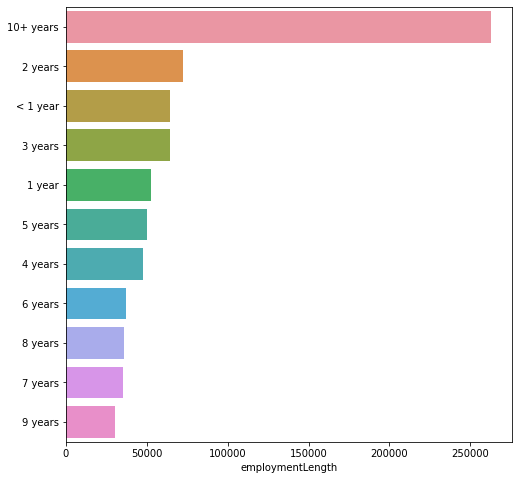

In [51]:
plt.figure(figsize=(8, 8))
sns.barplot(data_train["employmentLength"].value_counts(dropna=False)[:20],
            data_train["employmentLength"].value_counts(dropna=False).keys()[:20])
plt.show()

### 根绝y值不同可视化x某个特征的分布
#### 首先查看类别型变量在不同y值上的分布

In [52]:
train_loan_fr = data_train.loc[data_train['isDefault'] == 1]
train_loan_nofr = data_train.loc[data_train['isDefault'] == 0]

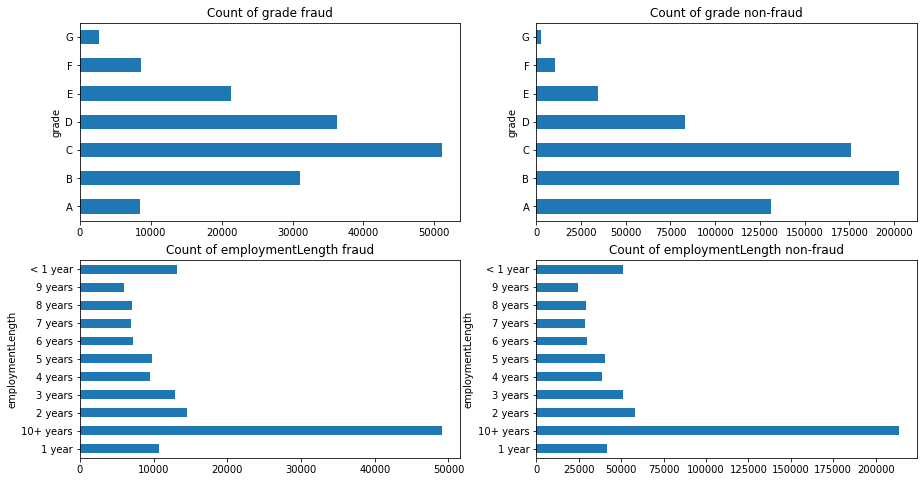

In [53]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 8))
train_loan_fr.groupby('grade')['grade'].count().plot(kind='barh', ax=ax1, title='Count of grade fraud')
train_loan_nofr.groupby('grade')['grade'].count().plot(kind='barh', ax=ax2, title='Count of grade non-fraud')
train_loan_fr.groupby('employmentLength')['employmentLength'].count().plot(kind='barh', ax=ax3, title='Count of employmentLength fraud')
train_loan_nofr.groupby('employmentLength')['employmentLength'].count().plot(kind='barh', ax=ax4, title='Count of employmentLength non-fraud')
plt.show()

#### 其次查看连续型变量在不同y值上的分布

### loanAmnt

<AxesSubplot:title={'center':'Log Loan Amt - Not Fraud'}, ylabel='Frequency'>

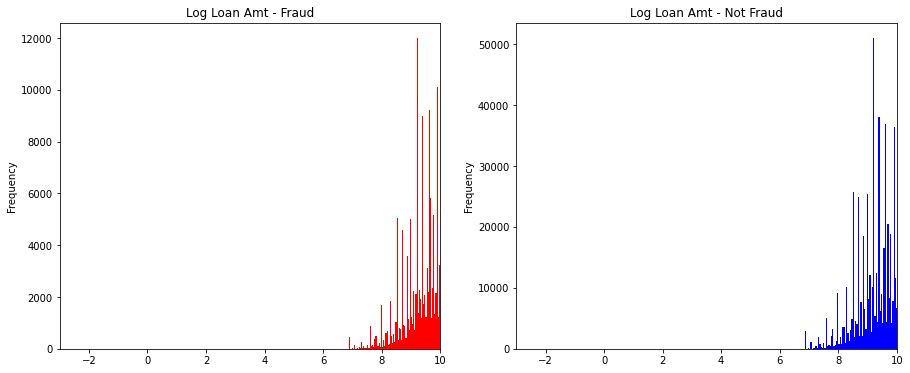

In [54]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 6))
data_train.loc[data_train['isDefault'] == 1] \
    ['loanAmnt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Loan Amt - Fraud',
          color='r',
          xlim=(-3, 10),
         ax= ax1)
data_train.loc[data_train['isDefault'] == 0] \
    ['loanAmnt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Loan Amt - Not Fraud',
          color='b',
          xlim=(-3, 10),
         ax=ax2)

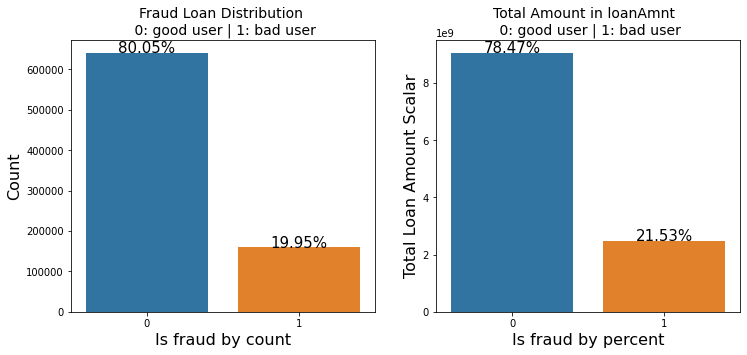

In [55]:
total = len(data_train)
total_amt = data_train.groupby(['isDefault'])['loanAmnt'].sum().sum()
plt.figure(figsize=(12,5))
plt.subplot(121)##1代表行，2代表列，所以一共有2个图，1代表此时绘制第一个图。
plot_tr = sns.countplot(x='isDefault',data=data_train)#data_train‘isDefault’这个特征每种类别的数量**
plot_tr.set_title("Fraud Loan Distribution \n 0: good user | 1: bad user", fontsize=14)
plot_tr.set_xlabel("Is fraud by count", fontsize=16)
plot_tr.set_ylabel('Count', fontsize=16)
for p in plot_tr.patches:
    height = p.get_height()
    plot_tr.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 
    
percent_amt = (data_train.groupby(['isDefault'])['loanAmnt'].sum())
percent_amt = percent_amt.reset_index()
plt.subplot(122)
plot_tr_2 = sns.barplot(x='isDefault', y='loanAmnt',  dodge=True, data=percent_amt)
plot_tr_2.set_title("Total Amount in loanAmnt  \n 0: good user | 1: bad user", fontsize=14)
plot_tr_2.set_xlabel("Is fraud by percent", fontsize=16)
plot_tr_2.set_ylabel('Total Loan Amount Scalar', fontsize=16)
for p in plot_tr_2.patches:
    height = p.get_height()
    plot_tr_2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_amt * 100),
            ha="center", fontsize=15)     

### interestRate

<AxesSubplot:title={'center':'Log Loan interestRate - Not Fraud'}, ylabel='Frequency'>

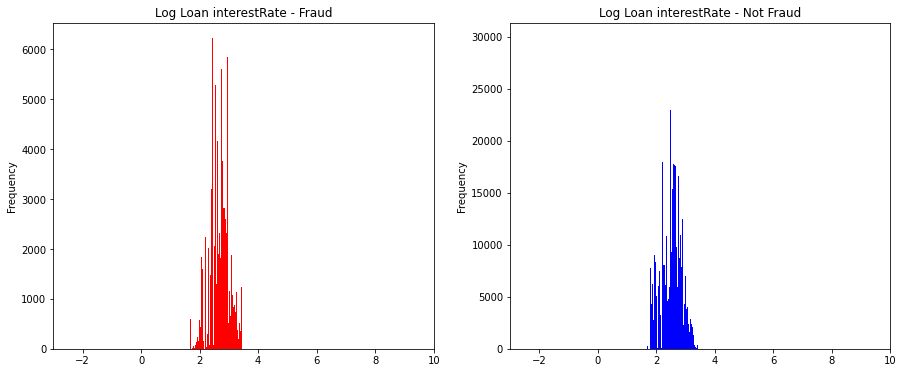

In [56]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 6))
data_train.loc[data_train['isDefault'] == 1] \
    ['interestRate'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Loan interestRate - Fraud',
          color='r',
          xlim=(-3, 10),
         ax= ax1)
data_train.loc[data_train['isDefault'] == 0] \
    ['interestRate'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Loan interestRate - Not Fraud',
          color='b',
          xlim=(-3, 10),
         ax=ax2)

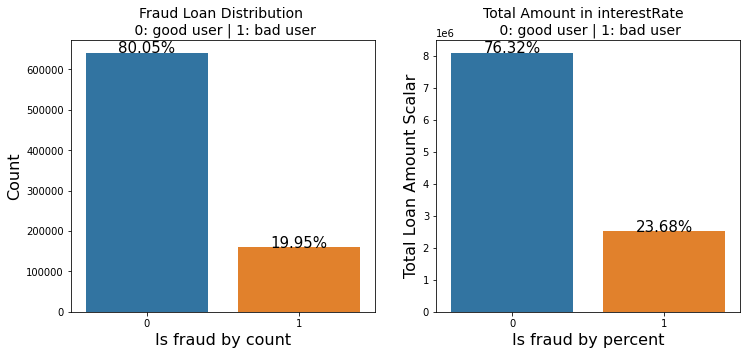

In [57]:
total = len(data_train)
total_itr = data_train.groupby(['isDefault'])['interestRate'].sum().sum()
plt.figure(figsize=(12,5))
plt.subplot(121)##1代表行，2代表列，所以一共有2个图，1代表此时绘制第一个图。
plot_tr = sns.countplot(x='isDefault',data=data_train)#data_train‘isDefault’这个特征每种类别的数量**
plot_tr.set_title("Fraud Loan Distribution \n 0: good user | 1: bad user", fontsize=14)
plot_tr.set_xlabel("Is fraud by count", fontsize=16)
plot_tr.set_ylabel('Count', fontsize=16)
for p in plot_tr.patches:
    height = p.get_height()
    plot_tr.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 
    
percent_itr = (data_train.groupby(['isDefault'])['interestRate'].sum())
percent_itr = percent_itr.reset_index()
plt.subplot(122)
plot_tr_2 = sns.barplot(x='isDefault', y='interestRate',  dodge=True, data=percent_itr)
plot_tr_2.set_title("Total Amount in interestRate  \n 0: good user | 1: bad user", fontsize=14)
plot_tr_2.set_xlabel("Is fraud by percent", fontsize=16)
plot_tr_2.set_ylabel('Total Loan Amount Scalar', fontsize=16)
for p in plot_tr_2.patches:
    height = p.get_height()
    plot_tr_2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_itr * 100),
            ha="center", fontsize=15)     

### installment

<AxesSubplot:title={'center':'Log Loan installment - Not Fraud'}, ylabel='Frequency'>

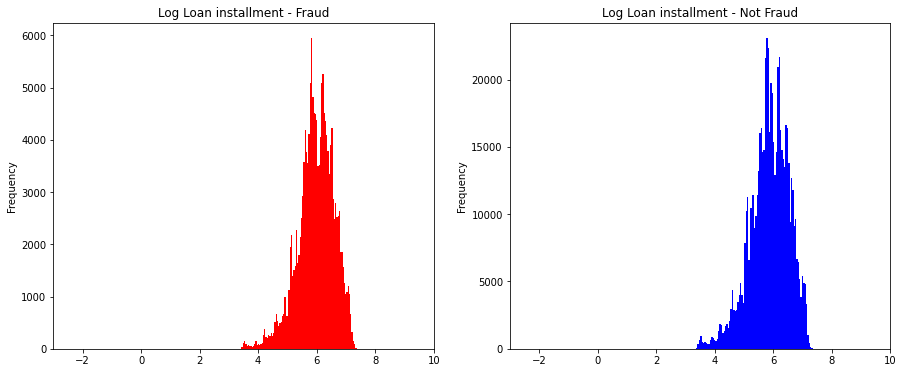

In [58]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 6))
data_train.loc[data_train['isDefault'] == 1] \
    ['installment'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Loan installment - Fraud',
          color='r',
          xlim=(-3, 10),
         ax= ax1)
data_train.loc[data_train['isDefault'] == 0] \
    ['installment'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Loan installment - Not Fraud',
          color='b',
          xlim=(-3, 10),
         ax=ax2)

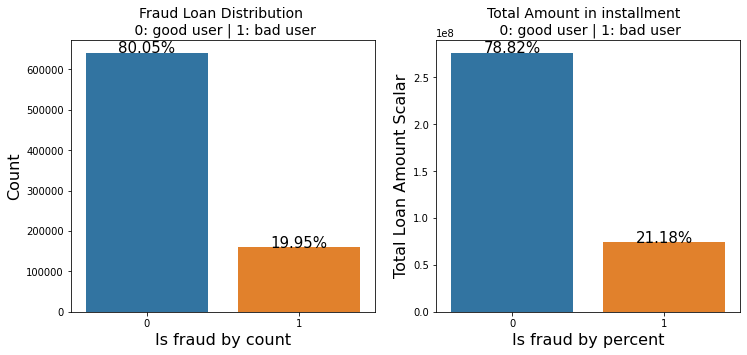

In [59]:
total = len(data_train)
total_installment = data_train.groupby(['isDefault'])['installment'].sum().sum()
plt.figure(figsize=(12,5))
plt.subplot(121)##1代表行，2代表列，所以一共有2个图，1代表此时绘制第一个图。
plot_tr = sns.countplot(x='isDefault',data=data_train)#data_train‘isDefault’这个特征每种类别的数量**
plot_tr.set_title("Fraud Loan Distribution \n 0: good user | 1: bad user", fontsize=14)
plot_tr.set_xlabel("Is fraud by count", fontsize=16)
plot_tr.set_ylabel('Count', fontsize=16)
for p in plot_tr.patches:
    height = p.get_height()
    plot_tr.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 
    
percent_installment = (data_train.groupby(['isDefault'])['installment'].sum())
percent_installment = percent_installment.reset_index()
plt.subplot(122)
plot_tr_2 = sns.barplot(x='isDefault', y='installment',  dodge=True, data=percent_installment)
plot_tr_2.set_title("Total Amount in installment  \n 0: good user | 1: bad user", fontsize=14)
plot_tr_2.set_xlabel("Is fraud by percent", fontsize=16)
plot_tr_2.set_ylabel('Total Loan Amount Scalar', fontsize=16)
for p in plot_tr_2.patches:
    height = p.get_height()
    plot_tr_2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_installment * 100),
            ha="center", fontsize=15)     

### employmentTitle(第一个有问题)

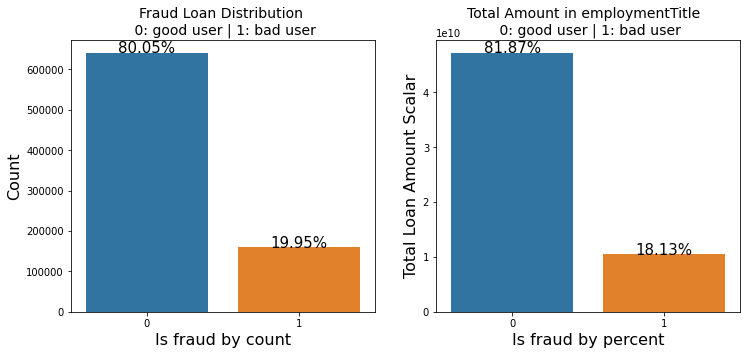

In [60]:
total = len(data_train)
total_employmentTitle = data_train.groupby(['isDefault'])['employmentTitle'].sum().sum()
plt.figure(figsize=(12,5))
plt.subplot(121)##1代表行，2代表列，所以一共有2个图，1代表此时绘制第一个图。
plot_tr = sns.countplot(x='isDefault',data=data_train)#data_train‘isDefault’这个特征每种类别的数量**
plot_tr.set_title("Fraud Loan Distribution \n 0: good user | 1: bad user", fontsize=14)
plot_tr.set_xlabel("Is fraud by count", fontsize=16)
plot_tr.set_ylabel('Count', fontsize=16)
for p in plot_tr.patches:
    height = p.get_height()
    plot_tr.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 
    
percent_employmentTitle = (data_train.groupby(['isDefault'])['employmentTitle'].sum())
percent_employmentTitle = percent_employmentTitle.reset_index()
plt.subplot(122)
plot_tr_2 = sns.barplot(x='isDefault', y='employmentTitle',  dodge=True, data=percent_employmentTitle)
plot_tr_2.set_title("Total Amount in employmentTitle  \n 0: good user | 1: bad user", fontsize=14)
plot_tr_2.set_xlabel("Is fraud by percent", fontsize=16)
plot_tr_2.set_ylabel('Total Loan Amount Scalar', fontsize=16)
for p in plot_tr_2.patches:
    height = p.get_height()
    plot_tr_2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_employmentTitle * 100),
            ha="center", fontsize=15)     

### purpose（第一个有问题）

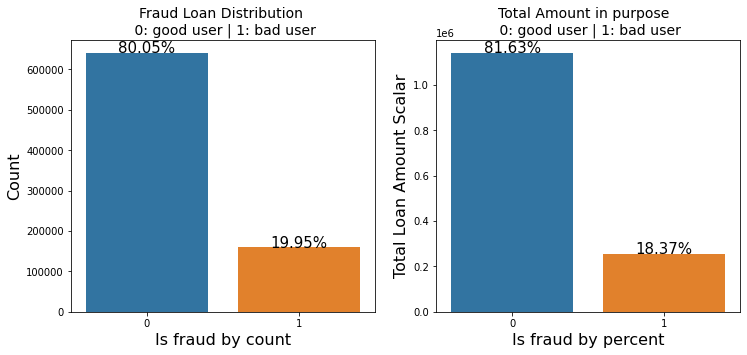

In [61]:
total = len(data_train)
total_purpose = data_train.groupby(['isDefault'])['purpose'].sum().sum()
plt.figure(figsize=(12,5))
plt.subplot(121)##1代表行，2代表列，所以一共有2个图，1代表此时绘制第一个图。
plot_tr = sns.countplot(x='isDefault',data=data_train)#data_train‘isDefault’这个特征每种类别的数量**
plot_tr.set_title("Fraud Loan Distribution \n 0: good user | 1: bad user", fontsize=14)
plot_tr.set_xlabel("Is fraud by count", fontsize=16)
plot_tr.set_ylabel('Count', fontsize=16)
for p in plot_tr.patches:
    height = p.get_height()
    plot_tr.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 
    
percent_purpose = (data_train.groupby(['isDefault'])['purpose'].sum())
percent_purpose = percent_purpose.reset_index()
plt.subplot(122)
plot_tr_2 = sns.barplot(x='isDefault', y='purpose',  dodge=True, data=percent_purpose)
plot_tr_2.set_title("Total Amount in purpose  \n 0: good user | 1: bad user", fontsize=14)
plot_tr_2.set_xlabel("Is fraud by percent", fontsize=16)
plot_tr_2.set_ylabel('Total Loan Amount Scalar', fontsize=16)
for p in plot_tr_2.patches:
    height = p.get_height()
    plot_tr_2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_purpose * 100),
            ha="center", fontsize=15)     

## 没画完 以后再说

In [62]:
#['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

In [63]:
NotFraud = data_train[data_train['isDefault']==0]
Fraud = data_train[data_train['isDefault']==1]

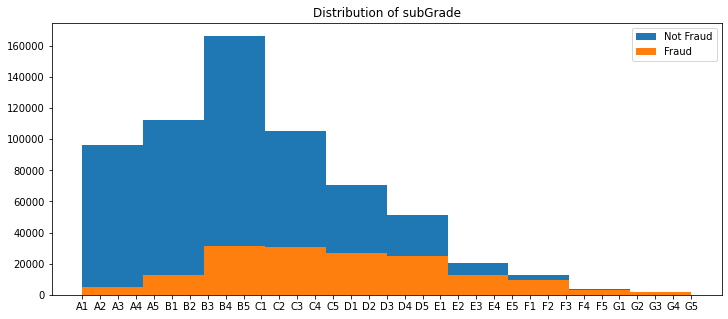

In [64]:
NotFraud.sort_values(by="subGrade" , inplace=True, ascending=True) 
Fraud.sort_values(by="subGrade" , inplace=True, ascending=True) 

plt.figure(figsize=(12,5))
plt.hist(NotFraud['subGrade'], label='Not Fraud');
plt.hist(Fraud['subGrade'], label='Fraud');
plt.legend();
plt.title('Distribution of subGrade');

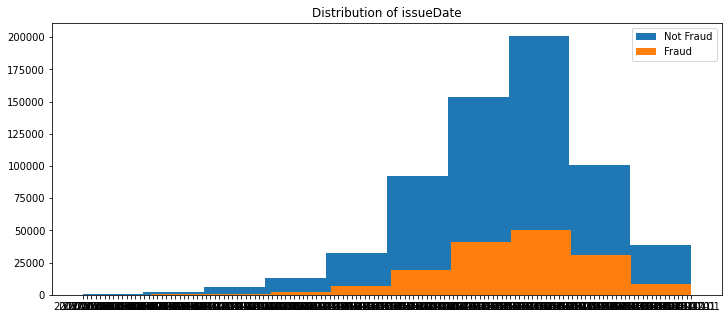

In [65]:
NotFraud.sort_values(by="issueDate" , inplace=True, ascending=True) 
Fraud.sort_values(by="issueDate" , inplace=True, ascending=True) 

plt.figure(figsize=(12,5))
plt.hist(NotFraud['issueDate'], label='Not Fraud');
plt.hist(Fraud['issueDate'], label='Fraud');
plt.legend();
plt.title('Distribution of issueDate');

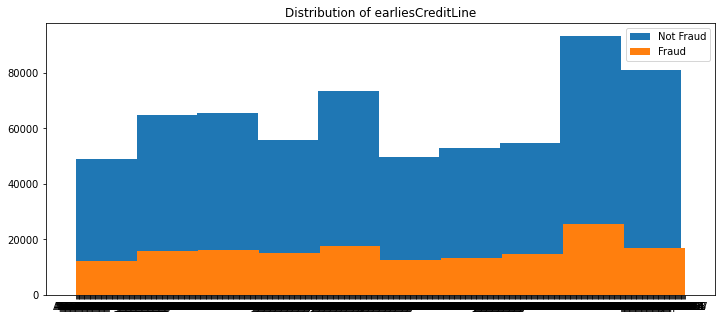

In [66]:
NotFraud.sort_values(by="earliesCreditLine" , inplace=True, ascending=True) 
Fraud.sort_values(by="earliesCreditLine" , inplace=True, ascending=True) 

plt.figure(figsize=(12,5))
plt.hist(NotFraud['earliesCreditLine'], label='Not Fraud');
plt.hist(Fraud['earliesCreditLine'], label='Fraud');
plt.legend();
plt.title('Distribution of earliesCreditLine');

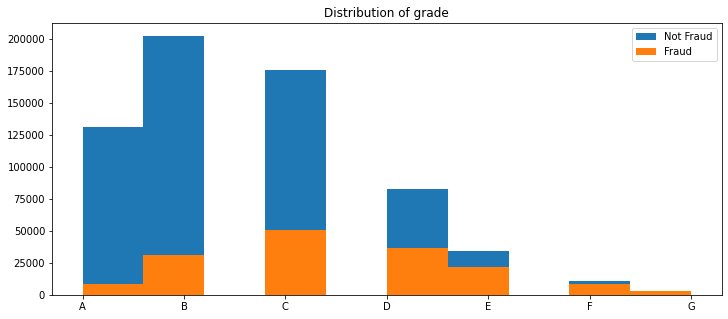

In [67]:
NotFraud.sort_values(by="grade" , inplace=True, ascending=True) 
Fraud.sort_values(by="grade" , inplace=True, ascending=True) 

plt.figure(figsize=(12,5))
plt.hist(NotFraud['grade'], label='Not Fraud');
plt.hist(Fraud['grade'], label='Fraud');
plt.legend();
plt.title('Distribution of grade');

## 时间格式数据处理及查看

In [68]:
#转化成时间格式  issueDateDT特征表示数据日期离数据集中日期最早的日期（2007-06-01）的天数
data_train['issueDate'] = pd.to_datetime(data_train['issueDate'],format='%Y-%m-%d')
startdate = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
data_train['issueDateDT'] = data_train['issueDate'].apply(lambda x: x-startdate).dt.days

In [69]:
#转化成时间格式
data_test_a['issueDate'] = pd.to_datetime(data_train['issueDate'],format='%Y-%m-%d')
startdate = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
data_test_a['issueDateDT'] = data_test_a['issueDate'].apply(lambda x: x-startdate).dt.days

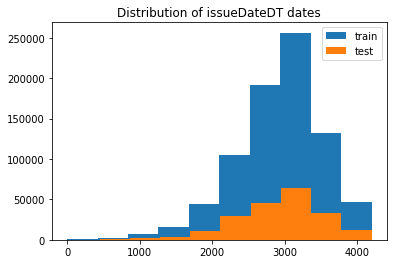

In [70]:
plt.hist(data_train['issueDateDT'], label='train');
plt.hist(data_test_a['issueDateDT'], label='test');
plt.legend();
plt.title('Distribution of issueDateDT dates');
#train 和 test issueDateDT 日期有重叠 所以使用基于时间的分割进行验证是不明智的

# TASK3 特征工程

## 特征预处理

In [71]:
numerical_fea = list(data_train.select_dtypes(exclude=['object']).columns)
category_fea = list(filter(lambda x: x not in numerical_fea,list(data_train.columns)))
label = 'isDefault'
numerical_fea.remove(label)

### 缺失值填充

In [72]:
#查看缺失值情况
data_train.isnull().sum()

id                        0
loanAmnt                  0
term                      0
interestRate              0
installment               0
grade                     0
subGrade                  0
employmentTitle           1
employmentLength      46799
homeOwnership             0
annualIncome              0
verificationStatus        0
issueDate                 0
isDefault                 0
purpose                   0
postCode                  1
regionCode                0
dti                     239
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies      405
revolBal                  0
revolUtil               531
totalAcc                  0
initialListStatus         0
applicationType           0
earliesCreditLine         0
title                     1
policyCode                0
n0                    40270
n1                    40270
n2                    40270
n3                  

In [73]:
data_train['employmentLength'].value_counts(dropna=False).sort_index()

1 year        52489
10+ years    262753
2 years       72358
3 years       64152
4 years       47985
5 years       50102
6 years       37254
7 years       35407
8 years       36192
9 years       30272
< 1 year      64237
NaN           46799
Name: employmentLength, dtype: int64

In [74]:
for data in [data_train, data_test_a]:
    data['employmentLength'] = data['employmentLength'].map({'< 1 year':0,'1 year':1,'2 years':2,'3 years':3,'4 years':4,'5 years':5,'6 years':6,'7 years':7,'8 years':8,'9 years':9,'10+ years':10})

In [75]:
data_train['employmentLength'].fillna(data_train['employmentLength'].median(), inplace = True)
data_test_a['employmentLength'].fillna(data_test_a['employmentLength'].median(), inplace = True)

In [76]:
data_train['employmentLength'].value_counts(dropna=False).sort_index()

0.0      64237
1.0      52489
2.0      72358
3.0      64152
4.0      47985
5.0      50102
6.0      84053
7.0      35407
8.0      36192
9.0      30272
10.0    262753
Name: employmentLength, dtype: int64

In [77]:
#按照中位数填充数值型特征
data_train[numerical_fea] = data_train[numerical_fea].fillna(data_train[numerical_fea].median())
data_test_a[numerical_fea] = data_test_a[numerical_fea].fillna(data_train[numerical_fea].median())
#按照众数填充类别型特征
data_train[category_fea] = data_train[category_fea].fillna(data_train[category_fea].mode())
data_test_a[category_fea] = data_test_a[category_fea].fillna(data_train[category_fea].mode())

In [78]:
data_train.isnull().sum()

id                    0
loanAmnt              0
term                  0
interestRate          0
installment           0
grade                 0
subGrade              0
employmentTitle       0
employmentLength      0
homeOwnership         0
annualIncome          0
verificationStatus    0
issueDate             0
isDefault             0
purpose               0
postCode              0
regionCode            0
dti                   0
delinquency_2years    0
ficoRangeLow          0
ficoRangeHigh         0
openAcc               0
pubRec                0
pubRecBankruptcies    0
revolBal              0
revolUtil             0
totalAcc              0
initialListStatus     0
applicationType       0
earliesCreditLine     0
title                 0
policyCode            0
n0                    0
n1                    0
n2                    0
n3                    0
n4                    0
n5                    0
n6                    0
n7                    0
n8                    0
n9              

In [79]:
#查看类别特征
category_fea

['grade', 'subGrade', 'employmentLength', 'earliesCreditLine']

### 时间格式处理

In [80]:
#转化成时间格式
for data in [data_train, data_test_a]:
    data['issueDate'] = pd.to_datetime(data['issueDate'],format='%Y-%m-%d')
    startdate = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
    #构造时间特征
    data['issueDateDT'] = data['issueDate'].apply(lambda x: x-startdate).dt.days

In [81]:
data_train['employmentLength'].value_counts(dropna=False).sort_index()

0.0      64237
1.0      52489
2.0      72358
3.0      64152
4.0      47985
5.0      50102
6.0      84053
7.0      35407
8.0      36192
9.0      30272
10.0    262753
Name: employmentLength, dtype: int64

### 对象类型转化成数值类型 

In [82]:
data_train['earliesCreditLine'].sample(5)

717109    Aug-1990
693201    Mar-1994
158891    Sep-2004
316904    Nov-2010
238937    Aug-2010
Name: earliesCreditLine, dtype: object

In [83]:
for data in [data_train, data_test_a]:
    data['earliesCreditLine'] = data['earliesCreditLine'].apply(lambda s: int(s[-4:]))

### 类别特征处理

In [84]:
# 部分类别特征
cate_features = ['grade', 'subGrade', 'employmentTitle', 'homeOwnership', 'verificationStatus', 'purpose', 'postCode', 'regionCode', \
                 'applicationType', 'initialListStatus', 'title', 'policyCode']
for f in cate_features:
    print(f, '类型数：', data[f].nunique())

grade 类型数： 7
subGrade 类型数： 35
employmentTitle 类型数： 79282
homeOwnership 类型数： 6
verificationStatus 类型数： 3
purpose 类型数： 14
postCode 类型数： 889
regionCode 类型数： 51
applicationType 类型数： 2
initialListStatus 类型数： 2
title 类型数： 12058
policyCode 类型数： 1


In [85]:
for data in [data_train, data_test_a]:
    data['grade'] = data['grade'].map({'A':10,'B':20,'C':30,'D':40,'E':50,'F':60,'G':70})

In [86]:
for data in [data_train, data_test_a]:
    data['subGrade'] = data['subGrade'].map({'A1':10,'A2':12,'A3':14,'A4':16,'A5':18,'B1':20,'B2':22,'B3':24,'B4':26,'B5':28,'C1':30,'C2':32,'C3':34,'C4':36,'C5':38,'D1':40,'D2':42,'D3':44,'D4':46,'D5':48,'E1':50,'E2':52,'E3':54,'E4':56,'E5':58,'F1':60,'F2':62,'F3':64,'F4':66,'F5':68,'G1':70,'G2':72,'G3':74,'G4':76,'G5':78})

In [87]:
# 类型数在2之上，又不是高维稀疏的,且纯分类特征
for data in [data_train, data_test_a]:
    data = pd.get_dummies(data, columns=['subGrade', 'homeOwnership', 'verificationStatus', 'purpose', 'regionCode'], drop_first=True)

## 这里存下的数据 用于模型优化——归一化前

In [88]:
data_train

id  loanAmnt  term  interestRate  installment  grade  subGrade  \
0            0   35000.0     5         19.52       917.97     50        52   
1            1   18000.0     5         18.49       461.90     40        42   
2            2   12000.0     5         16.99       298.17     40        44   
3            3   11000.0     3          7.26       340.96     10        16   
4            4    3000.0     3         12.99       101.07     30        32   
...        ...       ...   ...           ...          ...    ...       ...   
799995  799995   25000.0     3         14.49       860.41     30        36   
799996  799996   17000.0     3          7.90       531.94     10        16   
799997  799997    6000.0     3         13.33       203.12     30        34   
799998  799998   19200.0     3          6.92       592.14     10        16   
799999  799999    9000.0     3         11.06       294.91     20        24   

        employmentTitle  employmentLength  homeOwnership  ...    n6    n7  \
0                 320.0               2.0              2  ...   8.0   4.0   
1              219843.0               5.0              0  ...   7.0   7.0   
2               31698.0               8.0              0  ...  21.0   4.0   
3               46854.0              10.0              1  ...   4.0   7.0   
4                  54.0               6.0              1  ...   9.0  10.0   
...                 ...               ...            ...  ...   ...   ...   
799995           2659.0               7.0              1  ...   2.0  12.0   
799996          29205.0              10.0              0  ...  16.0   2.0   
799997           2582.0              10.0              1  ...  26.0   4.0   
799998            151.0              10.0              0  ...   6.0  12.0   
799999             13.0               5.0              0  ...   4.0   4.0   

          n8    n9   n10  n11  n12  n13  n14  issueDateDT  
0       12.0   2.0   7.0  0.0  0.0  0.0  2.0         2587  
1       13.0   5.0  13.0  0.0  0.0  0.0  2.0         1888  
2        5.0   3.0  11.0  0.0  0.0  0.0  4.0         3044  
3       21.0   6.0   9.0  0.0  0.0  0.0  1.0         2983  
4       15.0   7.0  12.0  0.0  0.0  0.0  4.0         3196  
...      ...   ...   ...  ...  ...  ...  ...          ...  
799995  13.0  10.0  14.0  0.0  0.0  0.0  3.0         3318  
799996  19.0   2.0   7.0  0.0  0.0  0.0  0.0         2131  
799997  10.0   4.0   5.0  0.0  0.0  1.0  4.0         3044  
799998  22.0   8.0  16.0  0.0  0.0  0.0  5.0         2802  
799999   8.0   3.0   7.0  0.0  0.0  0.0  2.0         4079  

[800000 rows x 48 columns]

In [89]:
data_train.to_csv('F:/毕业论文/数据/data_train.csv',encoding='gbk')

## 异常值处理

In [90]:
def find_outliers_by_3segama(data,fea):
    data_std = np.std(data[fea])
    data_mean = np.mean(data[fea])
    outliers_cut_off = data_std * 3
    lower_rule = data_mean - outliers_cut_off
    upper_rule = data_mean + outliers_cut_off
    data[fea+'_outliers'] = data[fea].apply(lambda x:str('异常值') if x > upper_rule or x < lower_rule else '正常值')
    return data

In [91]:
for fea in numerical_fea:
    data_train = find_outliers_by_3segama(data_train,fea)
    print(data_train[fea+'_outliers'].value_counts())
    print(data_train.groupby(fea+'_outliers')['isDefault'].sum())
    print('*'*10)

正常值    800000
Name: id_outliers, dtype: int64
id_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
正常值    800000
Name: loanAmnt_outliers, dtype: int64
loanAmnt_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
正常值    800000
Name: term_outliers, dtype: int64
term_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
正常值    794259
异常值      5741
Name: interestRate_outliers, dtype: int64
interestRate_outliers
异常值      2916
正常值    156694
Name: isDefault, dtype: int64
**********
正常值    792046
异常值      7954
Name: installment_outliers, dtype: int64
installment_outliers
异常值      2152
正常值    157458
Name: isDefault, dtype: int64
**********
正常值    800000
Name: employmentTitle_outliers, dtype: int64
employmentTitle_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
正常值    799701
异常值       299
Name: homeOwnership_outliers, dtype: int64
homeOwnership_outliers
异常值        62
正常值    159548
Name: isDefault, dtype: int64
**********
正常值    793973
异常值      

In [92]:
#删除异常值
for fea in numerical_fea:
    data_train = data_train[data_train[fea+'_outliers']=='正常值']
    data_train = data_train.reset_index(drop=True) 

In [93]:
data_train=data_train.drop(['policyCode'],axis=1)

In [94]:
data_train=data_train.drop(['n14_outliers'],axis=1)
data_train=data_train.drop(['n13_outliers'],axis=1)
data_train=data_train.drop(['n12_outliers'],axis=1)
data_train=data_train.drop(['n11_outliers'],axis=1)
data_train=data_train.drop(['n10_outliers'],axis=1)

In [95]:
data_train=data_train.drop(['n9_outliers'],axis=1)
data_train=data_train.drop(['n8_outliers'],axis=1)
data_train=data_train.drop(['n7_outliers'],axis=1)
data_train=data_train.drop(['n6_outliers'],axis=1)
data_train=data_train.drop(['n5_outliers'],axis=1)
data_train=data_train.drop(['n4_outliers'],axis=1)
data_train=data_train.drop(['n3_outliers'],axis=1)
data_train=data_train.drop(['n2_outliers'],axis=1)
data_train=data_train.drop(['n1_outliers'],axis=1)
data_train=data_train.drop(['n0_outliers'],axis=1)

In [96]:
data_train=data_train.drop(['id_outliers'],axis=1)
data_train=data_train.drop(['loanAmnt_outliers'],axis=1)
data_train=data_train.drop(['term_outliers'],axis=1)
data_train=data_train.drop(['interestRate_outliers'],axis=1)

data_train=data_train.drop(['installment_outliers'],axis=1)
data_train=data_train.drop(['employmentTitle_outliers'],axis=1)
data_train=data_train.drop(['homeOwnership_outliers'],axis=1)
data_train=data_train.drop(['annualIncome_outliers'],axis=1)
data_train=data_train.drop(['verificationStatus_outliers'],axis=1)
data_train=data_train.drop(['issueDate_outliers'],axis=1)
data_train=data_train.drop(['purpose_outliers'],axis=1)
data_train=data_train.drop(['regionCode_outliers'],axis=1)
data_train=data_train.drop(['postCode_outliers'],axis=1)
data_train=data_train.drop(['delinquency_2years_outliers'],axis=1)
data_train=data_train.drop(['dti_outliers'],axis=1)
data_train=data_train.drop(['ficoRangeLow_outliers'],axis=1)
data_train=data_train.drop(['ficoRangeHigh_outliers'],axis=1)
data_train=data_train.drop(['openAcc_outliers'],axis=1)
data_train=data_train.drop(['pubRec_outliers'],axis=1)
data_train=data_train.drop(['pubRecBankruptcies_outliers'],axis=1)
data_train=data_train.drop(['revolBal_outliers'],axis=1)
data_train=data_train.drop(['revolUtil_outliers'],axis=1)

data_train=data_train.drop(['totalAcc_outliers'],axis=1)
data_train=data_train.drop(['initialListStatus_outliers'],axis=1)
data_train=data_train.drop(['applicationType_outliers'],axis=1)
data_train=data_train.drop(['title_outliers'],axis=1)
data_train=data_train.drop(['policyCode_outliers'],axis=1)


In [97]:
data_train=data_train.drop(['issueDateDT_outliers'],axis=1)

In [98]:
data_train=data_train.drop(['issueDate'],axis=1)

In [99]:
data_train=data_train.drop(['id'],axis=1)

In [100]:
# 通过除法映射到间隔均匀的分箱中，每个分箱的取值范围都是loanAmnt/1000
data['loanAmnt_bin1'] = np.floor_divide(data['loanAmnt'], 1000)

In [101]:
## 通过对数函数映射到指数宽度分箱
data['loanAmnt_bin2'] = np.floor(np.log10(data['loanAmnt']))

0         4.0
1         4.0
2         4.0
3         4.0
4         4.0
         ... 
199995    3.0
199996    3.0
199997    4.0
199998    3.0
199999    3.0
Name: loanAmnt_bin2, Length: 200000, dtype: float64

## 特征选择

In [100]:
data_train.describe()

loanAmnt           term   interestRate    installment  \
count  606431.000000  606431.000000  606431.000000  606431.000000   
mean    14015.056041       3.483498      13.029983     423.044429   
std      8267.132252       0.856287       4.506617     241.505738   
min      1000.000000       3.000000       5.310000      21.250000   
25%      7900.000000       3.000000       9.670000     247.290000   
50%     12000.000000       3.000000      12.690000     368.080000   
75%     20000.000000       3.000000      15.610000     557.940000   
max     40000.000000       5.000000      27.490000    1222.310000   

               grade       subGrade  employmentTitle  employmentLength  \
count  606431.000000  606431.000000    606431.000000     606431.000000   
mean       26.999543      30.943240     67867.422581          5.942132   
std        12.468555      12.392756    103108.680607          3.570250   
min        10.000000      10.000000         0.000000          0.000000   
25%        20.000000      22.000000       427.000000          3.000000   
50%        30.000000      30.000000      7215.000000          6.000000   
75%        30.000000      38.000000    104479.500000         10.000000   
max        70.000000      78.000000    378351.000000         10.000000   

       homeOwnership   annualIncome  ...             n6             n7  \
count  606431.000000  606431.000000  ...  606431.000000  606431.000000   
mean        0.625105   71032.218547  ...       7.745999       7.666661   
std         0.669505   37755.261018  ...       5.861788       3.604565   
min         0.000000    2400.000000  ...       0.000000       0.000000   
25%         0.000000   45000.000000  ...       3.000000       5.000000   
50%         1.000000   62400.000000  ...       7.000000       7.000000   
75%         1.000000   87500.000000  ...      10.000000      10.000000   
max         2.000000  282586.000000  ...      30.000000      21.000000   

                  n8             n9            n10       n11       n12  \
count  606431.000000  606431.000000  606431.000000  606431.0  606431.0   
mean       13.434277       5.261895      10.834858       0.0       0.0   
std         6.579736       2.596706       4.389638       0.0       0.0   
min         1.000000       0.000000       0.000000       0.0       0.0   
25%         9.000000       3.000000       8.000000       0.0       0.0   
50%        13.000000       5.000000      10.000000       0.0       0.0   
75%        17.000000       7.000000      13.000000       0.0       0.0   
max        38.000000      14.000000      27.000000       0.0       0.0   

                 n13            n14    issueDateDT  
count  606431.000000  606431.000000  606431.000000  
mean        0.035773       2.008293    2936.670119  
std         0.185724       1.536636     545.576822  
min         0.000000       0.000000    1157.000000  
25%         0.000000       1.000000    2587.000000  
50%         0.000000       2.000000    2983.000000  
75%         0.000000       3.000000    3288.000000  
max         1.000000       7.000000    4201.000000  

[8 rows x 45 columns]

### 新的一波 唯一值

In [101]:
train=data_train.copy()

In [102]:
one_value_fea = [col for col in train.columns if train[col].nunique() <= 1]
one_value_fea

['applicationType', 'n11', 'n12']

In [103]:
train=train.drop(['applicationType'],axis=1)
train=train.drop(['n11'],axis=1)
train=train.drop(['n12'],axis=1)

## 计算协方差

In [104]:
y_simple = train['isDefault']
x_simple = train.drop(['isDefault'],axis=1)

In [105]:
#计算协方差
data_corr = x_simple.corrwith(train.isDefault) #计算相关性
result = pd.DataFrame(columns=['features', 'corr'])
result['features'] = data_corr.index
result['corr'] = data_corr.values

In [106]:
result

features      corr
0             loanAmnt  0.060597
1                 term  0.174756
2         interestRate  0.254760
3          installment  0.042642
4                grade  0.257020
5             subGrade  0.263137
6      employmentTitle -0.023988
7     employmentLength -0.014051
8        homeOwnership  0.054057
9         annualIncome -0.066031
10  verificationStatus  0.086951
11             purpose -0.032705
12            postCode  0.006500
13          regionCode  0.001320
14                 dti  0.104986
15  delinquency_2years  0.013752
16        ficoRangeLow -0.128018
17       ficoRangeHigh -0.128018
18             openAcc  0.016985
19              pubRec  0.028208
20  pubRecBankruptcies  0.022656
21            revolBal -0.019752
22           revolUtil  0.060072
23            totalAcc -0.024872
24   initialListStatus -0.003608
25   earliesCreditLine  0.037682
26               title -0.017747
27                  n0  0.014367
28                  n1  0.035710
29                  n2  0.067134
30                  n3  0.067134
31                  n4  0.009127
32                  n5 -0.021993
33                  n6 -0.004680
34                  n7  0.027390
35                  n8 -0.011333
36                  n9  0.064838
37                 n10  0.016031
38                 n13  0.010529
39                 n14  0.079282
40         issueDateDT  0.040512

<AxesSubplot:>

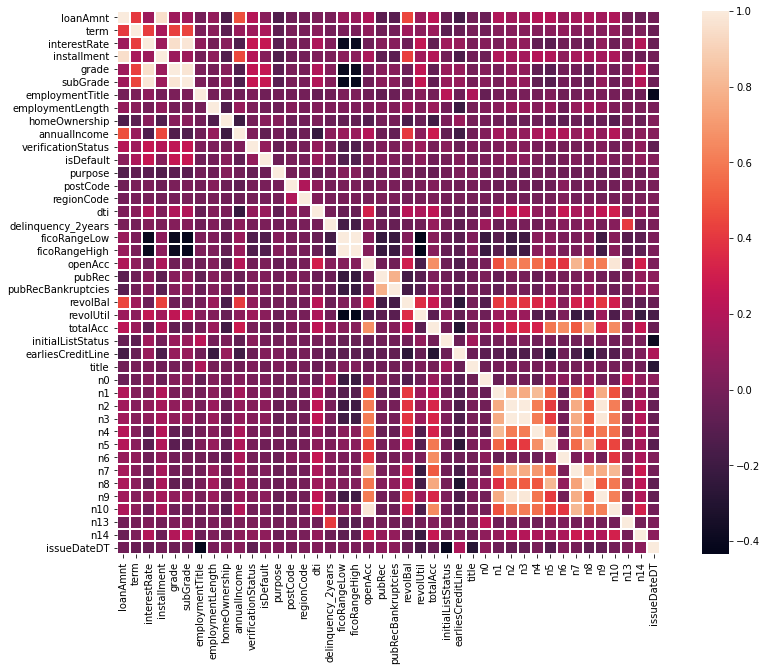

In [99]:
plt.subplots(figsize = (15,10))
sns.heatmap(train.corr(),linewidths=0.02,vmax=1.0, square=True)

In [107]:
# 方差过滤
trainfc=train.copy()
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold()
vt.fit_transform(trainfc)
var_thd = pd.DataFrame(vt.variances_, columns = ["Variance"], index=trainfc.columns)
var_thd = var_thd.reset_index()
var_thd.sort_values('Variance',ascending=0)
print(var_thd)

                 index       Variance
0             loanAmnt   39000.000000
1                 term       0.733225
2         interestRate      20.309560
3          installment    1201.060000
4                grade      60.000000
5             subGrade      68.000000
6      employmentTitle  378351.000000
7     employmentLength      10.000000
8        homeOwnership       0.448236
9         annualIncome  280186.000000
10  verificationStatus       0.600106
11           isDefault       0.157429
12             purpose       4.319556
13            postCode     858.000000
14          regionCode      49.000000
15                 dti      50.950000
16  delinquency_2years       0.225309
17        ficoRangeLow     130.000000
18       ficoRangeHigh     130.000000
19             openAcc      19.985712
20              pubRec       0.173171
21  pubRecBankruptcies       0.108183
22            revolBal   83589.000000
23           revolUtil     125.300000
24            totalAcc      58.000000
25   initial

In [108]:
#筛选 >0.8的
def var(a):
    return a >=0.8
#loc方法通过标签或者bool数组选取一些行和列
TVAR=var_thd.loc[var_thd['Variance'].apply(var)]
print(TVAR)


                index       Variance
0            loanAmnt   39000.000000
2        interestRate      20.309560
3         installment    1201.060000
4               grade      60.000000
5            subGrade      68.000000
6     employmentTitle  378351.000000
7    employmentLength      10.000000
9        annualIncome  280186.000000
12            purpose       4.319556
13           postCode     858.000000
14         regionCode      49.000000
15                dti      50.950000
17       ficoRangeLow     130.000000
18      ficoRangeHigh     130.000000
19            openAcc      19.985712
22           revolBal   83589.000000
23          revolUtil     125.300000
24           totalAcc      58.000000
26  earliesCreditLine      55.897912
27              title   25577.000000
29                 n1       3.445541
30                 n2       6.890579
31                 n3       6.890579
32                 n4       5.419085
33                 n5      15.429812
34                 n6      30.000000
3

# 建模

## Train & Test Split

In [104]:
# Make a new copy of the data
train_d = train.copy()

In [106]:
# Drop TripType (for y) and the least popular 6 depts. Leaving the rest for X

x = train_d.drop('isDefault',axis= 'columns').values
y = train_d.isDefault.values

# Splitting data into training, validation, and testing data
train_x,test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=999)



In [107]:
# show data shape
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(485144, 41)
(121287, 41)
(485144,)
(121287,)


##  回归

In [114]:
%%time
from sklearn.linear_model import LogisticRegression as LR
lrtrain_x = train_x
lrtrain_y=train_y
lrtest_x = test_x
lrtest_y = test_y

lr = LR()  # 建立逻辑回归模型
lr = lr.fit(lrtrain_x, lrtrain_y)  
# 用测试集做预测
lrpre_y = lr.predict(lrtest_x)

Wall time: 11.2 s


### Accuracy of Logistic Regression

In [115]:
print("The accuracy of Logistic Regression prediction is", 
      '{:.2%}'.format(accuracy_score(lrtest_y,lrpre_y)))

The accuracy of Logistic Regression prediction is 80.44%


### Log Loss of Logistic Regression

In [116]:
#y_pred = pre_y / pre_y.sum(axis=1)[:, np.newaxis]
lrpre_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [117]:
lrtest_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [118]:
#print("The log loss of Logistic Regression prediction is", 
   #   '{:.2}'.format(log_loss(y_true = test_y , y_pred = pre_y,labels=['test_y','pre_y'])))

print("The log loss of Logistic Regression prediction is", 
      '{:.2}'.format(log_loss(lrtest_y, lr.predict_proba(lrtest_x) )))

The log loss of Logistic Regression prediction is 0.48


### Confusion Matrix on Logistic Regression

In [119]:
#cm = (test_y, pre_y)
#cm
pd.crosstab(index    = lrtest_y, 
            columns  = lrpre_y, 
            rownames = ['Actual'], 
            colnames = ['Predicted'], 
            margins  = True)

Predicted       0    1     All
Actual                        
0           97496  129   97625
1           23597   65   23662
All        121093  194  121287

In [120]:
print(classification_report(lrtest_y, lrpre_y))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89     97625
           1       0.34      0.00      0.01     23662

    accuracy                           0.80    121287
   macro avg       0.57      0.50      0.45    121287
weighted avg       0.71      0.80      0.72    121287



## Supervised Learning - Decision Tree

In [121]:
%%time
from sklearn.tree import DecisionTreeClassifier as DTC
dtctrain_x = train_x
dtctrain_y=train_y
dtctest_x = test_x
dtctest_y = test_y

dtc = DTC()  # 建立逻辑回归模型
dtc = dtc.fit(dtctrain_x, dtctrain_y)  
# 用测试集做预测
dtcpre_y = dtc.predict(dtctest_x)

Wall time: 20.6 s


### Accuracy of Decision Tree

In [122]:
print("The accuracy of Decision Tree prediction is", 
      '{:.2%}'.format(accuracy_score(dtctest_y,dtcpre_y)))

The accuracy of Decision Tree prediction is 70.83%


### Log Loss of Decision Tree

In [123]:
#y_pred = pre_y / pre_y.sum(axis=1)[:, np.newaxis]
dtcpre_y

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [124]:
dtctest_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [125]:
#print("The log loss of Logistic Regression prediction is", 
   #   '{:.2}'.format(log_loss(y_true = test_y , y_pred = pre_y,labels=['test_y','pre_y'])))

print("The log loss of Decision Tree prediction is", 
      '{:.2}'.format(log_loss(dtctest_y, dtc.predict_proba(dtctest_x) )))

The log loss of Decision Tree prediction is 1e+01


### Confusion Matrix Decision Tree

In [126]:
#cm = confusion_matrix(test_y, pre_y)
#cm
pd.crosstab(index    = dtctest_y, 
            columns  = dtcpre_y, 
            rownames = ['Actual'], 
            colnames = ['Predicted'], 
            margins  = True)

Predicted      0      1     All
Actual                         
0          78791  18834   97625
1          16541   7121   23662
All        95332  25955  121287

In [127]:
print(classification_report(dtctest_y, dtcpre_y))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82     97625
           1       0.27      0.30      0.29     23662

    accuracy                           0.71    121287
   macro avg       0.55      0.55      0.55    121287
weighted avg       0.72      0.71      0.71    121287



## 判别分析

In [128]:
%%time
from sklearn.neighbors import KNeighborsClassifier as KNC
knctrain_x = train_x
knctrain_y=train_y
knctest_x = test_x
knctest_y = test_y

knc = KNC()  # 建立判别模型
knc = knc.fit(knctrain_x, knctrain_y)  

# 用测试集做预测
kncpre_y = knc.predict(knctest_x)

Wall time: 50.8 s


### Accuracy of Decision KNC

In [129]:
print("The accuracy of KNC prediction is", 
      '{:.2%}'.format(accuracy_score(knctest_y,kncpre_y)))

The accuracy of KNC prediction is 77.08%


### Log Loss of Decision KNC

In [130]:
#y_pred = pre_y / pre_y.sum(axis=1)[:, np.newaxis]
kncpre_y

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [131]:
knctest_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [132]:
#print("The log loss of Logistic Regression prediction is", 
   #   '{:.2}'.format(log_loss(y_true = test_y , y_pred = pre_y,labels=['test_y','pre_y'])))

print("The log loss of KNC prediction is", 
      '{:.2}'.format(log_loss(knctest_y, knc.predict_proba(knctest_x) )))

The log loss of KNC prediction is 2.5


### Confusion Matrix KNC

In [133]:
#cm = confusion_matrix(test_y, pre_y)
#cm
pd.crosstab(index    = knctest_y, 
            columns  = kncpre_y, 
            rownames = ['Actual'], 
            colnames = ['Predicted'], 
            margins  = True)

Predicted       0     1     All
Actual                         
0           91360  6265   97625
1           21539  2123   23662
All        112899  8388  121287

In [134]:
print(classification_report(knctest_y, kncpre_y))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87     97625
           1       0.25      0.09      0.13     23662

    accuracy                           0.77    121287
   macro avg       0.53      0.51      0.50    121287
weighted avg       0.70      0.77      0.72    121287



## 神经网络

In [135]:
%%time
from sklearn.neural_network import MLPClassifier as MLP
mlptrain_x = train_x
mlptrain_y=train_y
mlptest_x = test_x
mlptest_y = test_y

mlp = MLP(solver = 'adam',hidden_layer_sizes = [50,50],max_iter = 2000,random_state = 0)# 建立神经网络模型
mlp = mlp.fit(mlptrain_x, mlptrain_y)  
# 用测试集做预测
mlppre_y = mlp.predict(mlptest_x)

Wall time: 4min 6s


### Accuracy of Decision MLP

In [136]:
print("The accuracy of MLP prediction is", 
      '{:.2%}'.format(accuracy_score(mlptest_y,mlppre_y)))

The accuracy of MLP prediction is 80.49%


### Log Loss of Decision MLP

In [137]:
#y_pred = pre_y / pre_y.sum(axis=1)[:, np.newaxis]
mlppre_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [138]:
mlptest_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [139]:
#print("The log loss of Logistic Regression prediction is", 
   #   '{:.2}'.format(log_loss(y_true = test_y , y_pred = pre_y,labels=['test_y','pre_y'])))

print("The log loss of MLP prediction is", 
      '{:.2}'.format(log_loss(mlptest_y, mlp.predict_proba(mlptest_x) )))

The log loss of MLP prediction is 0.49


### Confusion Matrix MLP

In [140]:
#cm = confusion_matrix(test_y, pre_y)
#cm
pd.crosstab(index    = mlptest_y, 
            columns  = mlppre_y, 
            rownames = ['Actual'], 
            colnames = ['Predicted'], 
            margins  = True)

Predicted       0     All
Actual                   
0           97625   97625
1           23662   23662
All        121287  121287

In [141]:
print(classification_report(mlptest_y, mlppre_y))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     97625
           1       0.00      0.00      0.00     23662

    accuracy                           0.80    121287
   macro avg       0.40      0.50      0.45    121287
weighted avg       0.65      0.80      0.72    121287



In [142]:
if __name__ == '__main__':
    # Y = normalized(Y)
   
    train_x = train_x
    test_x = test_x
    # 首先，创建一个多分类模型对象 类似于Java的类调用
    # 括号中填写多个参数，如果不写，则使用默认值，我们一般要构建隐层结构，调试正则化参数，设置最大迭代次数
    mlp = MLPClassifier(hidden_layer_sizes=(10,), alpha=0.01, max_iter=10000)
    # 调用fit函数就可以进行模型训练，一般的调用模型函数的训练方法都是fit()
    # print(train_x.shape)
    # print(train_y.ravel().shape)
    mlp.fit(train_x, train_y.ravel())  # 这里y值需要注意，还原成一维数组
    # 模型就这样训练好了，而后我们可以调用多种函数来获取训练好的参数
    # 比如获取准确率
    print('训练集的准确率是：', mlp.score(test_x, test_y.ravel()))
    # 比如输出当前的代价值
    print('训练集的代价值是：', mlp.loss_)
    # 比如输出每个theta的权重
    print('训练集的权重值是：', mlp.coefs_)

NameError: name 'MLPClassifier' is not defined

## GBDT

In [109]:
%%time
from sklearn.ensemble import GradientBoostingClassifier as GBDT
from sklearn.externals import joblib

gbdttrain_x = train_x
gbdttrain_y=train_y
gbdttest_x = test_x
gbdttest_y = test_y

gbr = GBDT(n_estimators = 3000,max_depth = 2,min_samples_split = 2,learning_rate = 0.1)
gbr.fit(gbdttrain_x,gbdttrain_y)
gbdtpre_y = gbr.predict(gbdttest_x)

Wall time: 2h 3min 35s


### Accuracy of Decision GBDT

In [110]:
print("The accuracy of MLP prediction is", 
      '{:.2%}'.format(accuracy_score(gbdttest_y,gbdtpre_y)))

The accuracy of MLP prediction is 81.09%


### Confusion Matrix GBDT

In [111]:
#cm = confusion_matrix(test_y, pre_y)
#cm
pd.crosstab(index    = gbdttest_y, 
            columns  = gbdtpre_y, 
            rownames = ['Actual'], 
            colnames = ['Predicted'], 
            margins  = True)

Predicted       0     1     All
Actual                         
0           95913  1712   97625
1           21225  2437   23662
All        117138  4149  121287

In [112]:
print(classification_report(gbdttest_y, gbdtpre_y))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89     97625
           1       0.59      0.10      0.18     23662

    accuracy                           0.81    121287
   macro avg       0.70      0.54      0.53    121287
weighted avg       0.77      0.81      0.75    121287



# 模型改进

## 归一化

In [144]:
gj_train = train.copy()

In [147]:
x = gj_train.drop('isDefault',axis= 'columns').values


In [ ]:
y = gj_train.isDefault.values
x

In [148]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(x)
print(X_train_minmax)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [151]:
train.to_csv('F:/毕业论文/数据/traindata.csv',encoding='gbk')